In [ ]:
import pandas as pd
import sqlite3
import json
import matplotlib.pyplot as plt
import seaborn as sns


In [5]:
orders = pd.read_csv("orders.csv")
orders.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name
0,1,2508,450,18-02-2023,842.97,New Foods Chinese
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian


In [6]:

orders.shape


(10000, 6)

In [7]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   order_id         10000 non-null  int64  
 1   user_id          10000 non-null  int64  
 2   restaurant_id    10000 non-null  int64  
 3   order_date       10000 non-null  object 
 4   total_amount     10000 non-null  float64
 5   restaurant_name  10000 non-null  object 
dtypes: float64(1), int64(3), object(2)
memory usage: 468.9+ KB


In [8]:
with open("users.json", "r") as file:
    users_data = json.load(file)

users = pd.DataFrame(users_data)
users.head()


,user_id,name,city,membership
0,1,User_1,Chennai,Regular
1,2,User_2,Pune,Gold
2,3,User_3,Bangalore,Gold
3,4,User_4,Bangalore,Regular
4,5,User_5,Pune,Gold


In [9]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     3000 non-null   int64 
 1   name        3000 non-null   object
 2   city        3000 non-null   object
 3   membership  3000 non-null   object
dtypes: int64(1), object(3)
memory usage: 93.9+ KB


In [10]:
conn = sqlite3.connect("restaurants.db")


In [11]:
with open("restaurants.sql", "r") as file:
    sql_script = file.read()

conn.executescript(sql_script)


In [12]:
restaurants = pd.read_sql("SELECT * FROM restaurants", conn)
restaurants.head()



,restaurant_id,restaurant_name,cuisine,rating
0,1,Restaurant_1,Chinese,4.8
1,2,Restaurant_2,Indian,4.1
2,3,Restaurant_3,Mexican,4.3
3,4,Restaurant_4,Chinese,4.1
4,5,Restaurant_5,Chinese,4.8


In [13]:
orders_users = pd.merge(
    orders,
    users,
    how="left",
    left_on="user_id",
    right_on="user_id"
)

orders_users.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name,name,city,membership
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular


In [14]:
final_df = pd.merge(
    orders_users,
    restaurants,
    how="left",
    left_on="restaurant_id",
    right_on="restaurant_id"
)

final_df.head()


,order_id,user_id,restaurant_id,order_date,total_amount,restaurant_name_x,name,city,membership,restaurant_name_y,cuisine,rating
0,1,2508,450,18-02-2023,842.97,New Foods Chinese,User_2508,Hyderabad,Regular,Restaurant_450,Mexican,3.2
1,2,2693,309,18-01-2023,546.68,Ruchi Curry House Multicuisine,User_2693,Pune,Regular,Restaurant_309,Indian,4.5
2,3,2084,107,15-07-2023,163.93,Spice Kitchen Punjabi,User_2084,Chennai,Gold,Restaurant_107,Mexican,4.0
3,4,319,224,04-10-2023,1155.97,Darbar Kitchen Non-Veg,User_319,Bangalore,Gold,Restaurant_224,Chinese,4.8
4,5,1064,293,25-12-2023,1321.91,Royal Eatery South Indian,User_1064,Pune,Regular,Restaurant_293,Italian,3.0


In [15]:
final_df.to_csv("final_food_delivery_dataset.csv", index=False)


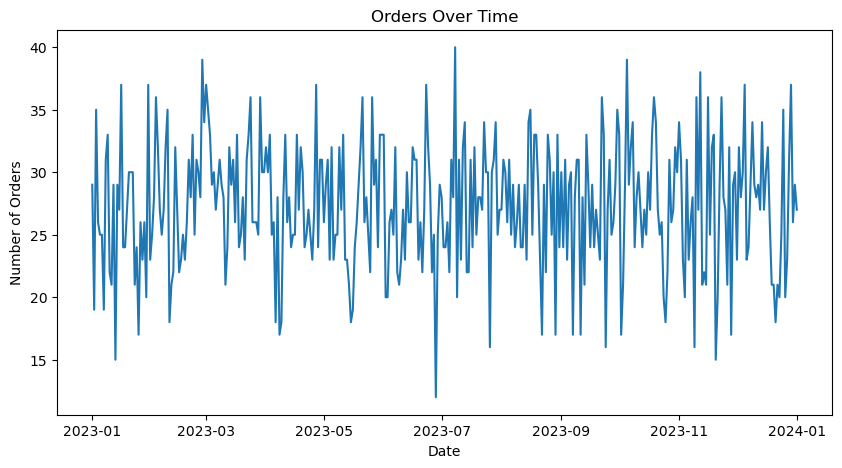

In [21]:
final_df['order_date'] = pd.to_datetime(
    final_df['order_date'],
    format="%d-%m-%Y"
)
orders_by_date = final_df.groupby(final_df['order_date'].dt.date).size()


plt.figure(figsize=(10,5))
orders_by_date.plot()
plt.title("Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.show()


In [22]:
final_df['order_date'].head()


0   2023-02-18
1   2023-01-18
2   2023-07-15
3   2023-10-04
4   2023-12-25
Name: order_date, dtype: datetime64[ns]

In [23]:
user_orders = final_df.groupby("user_id")["order_id"].count()

user_orders.describe()


count    2883.000000
mean        3.468609
std         1.792682
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        13.000000
Name: order_id, dtype: float64

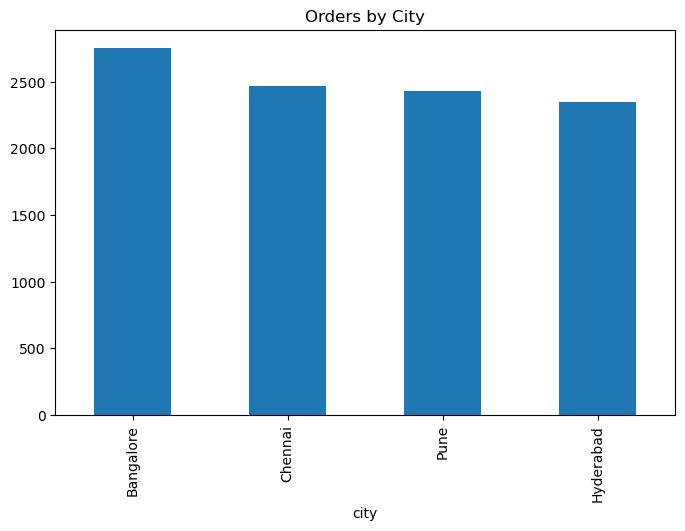

In [24]:
city_orders = final_df.groupby("city")["order_id"].count().sort_values(ascending=False)

city_orders.plot(kind="bar", figsize=(8,5))
plt.title("Orders by City")
plt.show()


In [25]:
cuisine_orders = final_df.groupby("cuisine")["order_id"].count().sort_values(ascending=False)

cuisine_orders.head(10)


cuisine
Mexican    2581
Italian    2532
Indian     2469
Chinese    2418
Name: order_id, dtype: int64

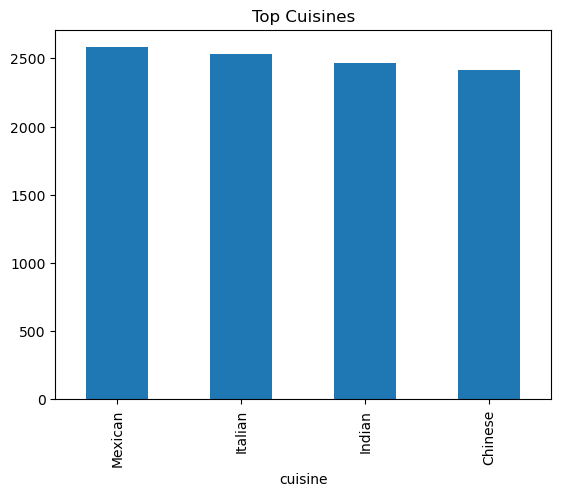

In [26]:
cuisine_orders.head(10).plot(kind="bar")
plt.title("Top Cuisines")
plt.show()


In [30]:
final_df.columns

Index(['order_id', 'user_id', 'restaurant_id', 'order_date', 'total_amount',
       'restaurant_name_x', 'name', 'city', 'membership', 'restaurant_name_y',
       'cuisine', 'rating'],
      dtype='object')

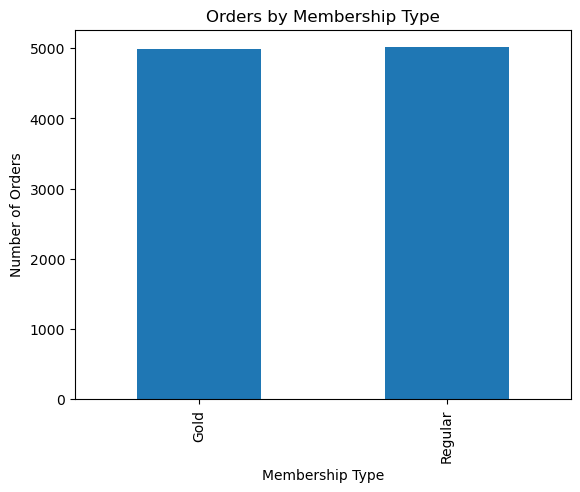

In [31]:
membership_orders = final_df.groupby("membership")["order_id"].count()
membership_orders.plot(kind="bar")
plt.title("Orders by Membership Type")
plt.xlabel("Membership Type")
plt.ylabel("Number of Orders")
plt.show()


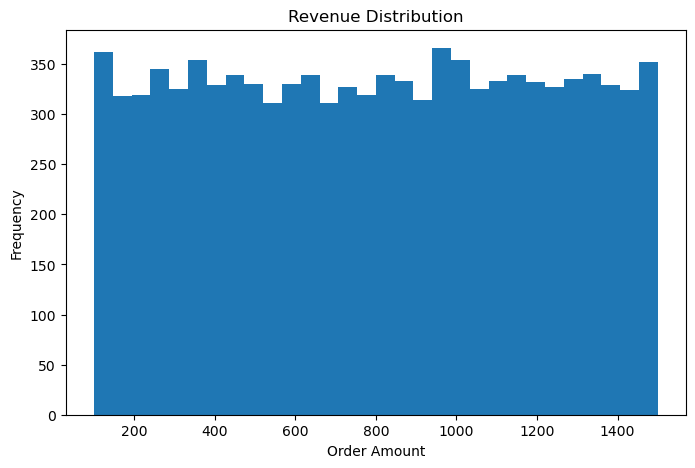

In [35]:
plt.figure(figsize=(8,5))
plt.hist(final_df["total_amount"], bins=30)
plt.title("Revenue Distribution")
plt.xlabel("Order Amount")
plt.ylabel("Frequency")
plt.show()
